In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
books = pd.read_csv('/home/sushil/Documents/Assingment/AR-9/book.csv')

In [132]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [133]:
from mlxtend.frequent_patterns import association_rules,apriori

In [138]:
items = apriori(books,min_support=0.005,max_len=3,use_colnames=True)

In [139]:
items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(ItalCook, GeogBks, Florence)"
220,0.0115,"(ItalArt, GeogBks, ItalAtlas)"
221,0.0090,"(ItalArt, GeogBks, Florence)"
222,0.0125,"(ItalArt, ItalCook, ItalAtlas)"


In [140]:
items.sort_values('support',ascending = False,inplace=True)

In [141]:
items

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
...,...,...
206,0.0065,"(RefBks, ItalAtlas, Florence)"
64,0.0065,"(ItalAtlas, Florence)"
207,0.0055,"(ItalArt, RefBks, Florence)"
109,0.0055,"(ItalAtlas, ChildBks, Florence)"


In [142]:
rules = association_rules(items,metric='lift',min_threshold=1)

In [143]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
1049,"(ItalArt, Florence)",(YouthBks),0.0125,0.2475,0.0055,0.440000,1.777778,0.002406,1.343750
1050,"(YouthBks, Florence)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
1051,(ItalArt),"(YouthBks, Florence)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145
1052,(YouthBks),"(ItalArt, Florence)",0.2475,0.0125,0.0055,0.022222,1.777778,0.002406,1.009943


In [144]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [145]:
z=rules.sort_values('lift',ascending=False)

In [146]:
z

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
745,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
744,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
352,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
...,...,...,...,...,...,...,...,...,...
301,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
411,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
410,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
306,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


In [147]:
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fa55fe2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fa55fe9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fa55f0f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fb1c38040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fb1c383a0>],
 'means': []}

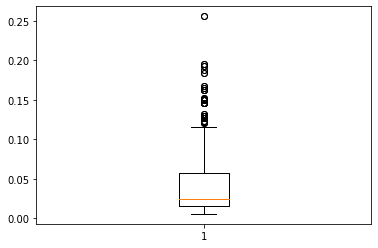

In [148]:
plt.boxplot(rules.support)

(array([622., 150., 104., 106.,  36.,  18.,   8.,   8.,   0.,   2.]),
 array([0.0055 , 0.03055, 0.0556 , 0.08065, 0.1057 , 0.13075, 0.1558 ,
        0.18085, 0.2059 , 0.23095, 0.256  ]),
 <BarContainer object of 10 artists>)

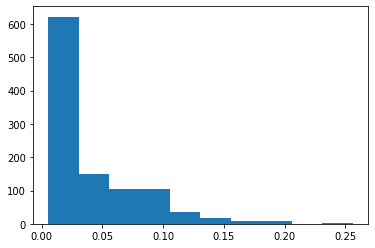

In [150]:
plt.hist(rules.support)

(array([868.,  80.,  60.,  20.,  18.,   4.,   0.,   0.,   2.,   2.]),
 array([ 1.01574946,  3.14390425,  5.27205903,  7.40021381,  9.5283686 ,
        11.65652338, 13.78467816, 15.91283295, 18.04098773, 20.16914251,
        22.2972973 ]),
 <BarContainer object of 10 artists>)

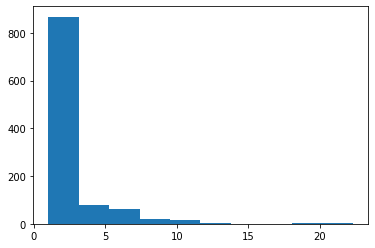

In [151]:
plt.hist(rules.lift)

<AxesSubplot:xlabel='lift'>

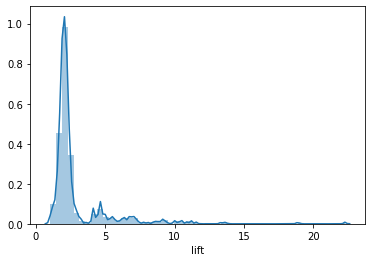

In [154]:
sns.distplot(rules.lift)

<AxesSubplot:xlabel='antecedent support'>

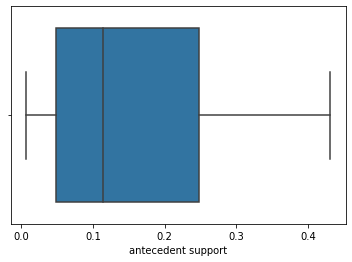

In [155]:
sns.boxplot(rules.iloc[:,2])

In [158]:
item2 = apriori(books,min_support=0.001,max_len=3,use_colnames=True)

In [157]:
item2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(ItalCook, GeogBks, Florence)"
220,0.0115,"(ItalArt, GeogBks, ItalAtlas)"
221,0.0090,"(ItalArt, GeogBks, Florence)"
222,0.0125,"(ItalArt, ItalCook, ItalAtlas)"


In [162]:
item2.sort_values('support',ascending = False,inplace=True)

In [163]:
item2

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
...,...,...
219,0.0040,"(ArtBks, ItalAtlas, Florence)"
228,0.0040,"(ItalCook, ItalAtlas, Florence)"
230,0.0040,"(ItalArt, ItalAtlas, Florence)"
145,0.0035,"(YouthBks, ItalAtlas, Florence)"


In [164]:
rule2 = association_rules(items,metric='lift',min_threshold=2)

In [165]:
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
2,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
3,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
4,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
...,...,...,...,...,...,...,...,...,...
671,(ChildBks),"(ItalAtlas, Florence)",0.4230,0.0065,0.0055,0.013002,2.000364,0.002750,1.006588
672,"(ItalArt, YouthBks)",(Florence),0.0230,0.1085,0.0055,0.239130,2.203967,0.003004,1.171686
673,"(YouthBks, Florence)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
674,(ItalArt),"(YouthBks, Florence)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145


In [168]:
w=rule2.sort_values('lift',ascending=False)

In [169]:
w

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
462,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
467,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
458,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
459,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
209,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
...,...,...,...,...,...,...,...,...,...
79,"(ArtBks, ChildBks)",(YouthBks),0.1625,0.2475,0.0805,0.495385,2.001554,0.040281,1.491235
100,"(YouthBks, GeogBks)",(DoItYBks),0.1205,0.2820,0.0680,0.564315,2.001118,0.034019,1.647981
101,(DoItYBks),"(YouthBks, GeogBks)",0.2820,0.1205,0.0680,0.241135,2.001118,0.034019,1.158967
668,"(ItalAtlas, Florence)",(ChildBks),0.0065,0.4230,0.0055,0.846154,2.000364,0.002750,3.750500


In [170]:
item3 = apriori(books,min_support=0.004,max_len=3,use_colnames=True)

In [171]:
item3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
224,0.0090,"(ItalArt, GeogBks, Florence)"
225,0.0125,"(ItalArt, ItalCook, ItalAtlas)"
226,0.0040,"(ItalCook, ItalAtlas, Florence)"
227,0.0095,"(ItalArt, ItalCook, Florence)"


In [172]:
item3.sort_values('support',ascending = False,inplace=True)

In [173]:
item3.head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
12,0.256,"(ChildBks, CookBks)"


In [174]:
rule3 = association_rules(items,metric='lift',min_threshold=3)

In [175]:
rule3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
1,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
4,"(ItalArt, CookBks)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf


In [176]:
u=rule3.sort_values('lift',ascending=False)

In [177]:
u

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
115,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
107,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
106,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
10,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
...,...,...,...,...,...,...,...,...,...
0,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
89,(ArtBks),"(YouthBks, Florence)",0.2410,0.0255,0.0190,0.078838,3.091693,0.012855,1.057903
88,"(YouthBks, Florence)",(ArtBks),0.0255,0.2410,0.0190,0.745098,3.091693,0.012855,2.977615
187,(ItalAtlas),"(ChildBks, Florence)",0.0370,0.0485,0.0055,0.148649,3.064921,0.003705,1.117635
